<a href="https://colab.research.google.com/github/dasamnaveen/YBI_Foundation/blob/main/Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hand Writing Digit Prediction - Classification Analysis**

##Objective
The Digits dataset consists of 8x8 pixel image of digits. The image attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

###Data Source

From sklearn the datasets are imported by default.
By using the dataset (from sklearn.datasets import load_images)

###Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

###Import Data

In [4]:
from sklearn.datasets import load_digits

###Describe Data

In [5]:
df = load_digits()

###Data Visualization

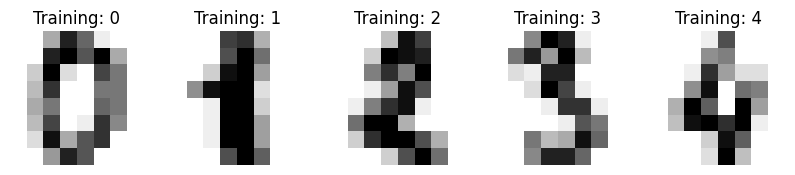

In [6]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

###Data Preprocessing

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples = len(df.images)
data = df.images.reshape((n_samples), -1)

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

###Define Target Variable (y) and Feature Variables (X)

In [15]:
data.min()

0.0

In [16]:
data.max()

16.0

In [17]:
data = data/16

In [18]:
data.min()

0.0

In [19]:
data.max()

1.0

In [20]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

###Train Test Split Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(data, df.target, test_size=0.3)

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

###Random Forest Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

###Model Evaluation

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

###Predict Test Data

In [27]:
Y_pred = rf.predict(X_test)

In [28]:
Y_pred

array([9, 1, 8, 9, 7, 1, 0, 5, 6, 0, 8, 3, 5, 0, 9, 4, 5, 1, 3, 5, 4, 5,
       0, 7, 6, 0, 3, 9, 5, 3, 6, 5, 0, 7, 4, 0, 5, 7, 7, 2, 2, 6, 3, 8,
       9, 9, 6, 7, 5, 3, 9, 2, 9, 1, 6, 1, 3, 9, 8, 3, 6, 7, 5, 9, 7, 3,
       8, 6, 5, 2, 4, 2, 9, 8, 7, 9, 6, 2, 0, 9, 3, 4, 7, 0, 3, 1, 4, 2,
       3, 0, 9, 4, 2, 3, 6, 6, 9, 6, 5, 0, 5, 6, 5, 5, 0, 2, 0, 7, 1, 5,
       7, 4, 1, 1, 8, 7, 0, 7, 1, 7, 6, 3, 4, 9, 1, 0, 5, 2, 4, 0, 7, 1,
       3, 8, 7, 7, 5, 9, 3, 1, 5, 6, 2, 3, 9, 5, 3, 1, 7, 6, 0, 8, 1, 9,
       9, 9, 0, 3, 5, 3, 2, 0, 1, 1, 4, 9, 9, 9, 6, 5, 5, 4, 7, 4, 6, 9,
       6, 6, 3, 4, 7, 3, 8, 2, 0, 7, 4, 4, 0, 1, 1, 0, 7, 2, 5, 1, 9, 0,
       0, 9, 9, 7, 9, 0, 8, 0, 7, 2, 6, 2, 8, 5, 0, 0, 6, 4, 2, 1, 7, 6,
       7, 1, 5, 2, 6, 1, 1, 2, 3, 7, 3, 7, 6, 9, 4, 5, 1, 6, 5, 7, 3, 1,
       3, 1, 5, 3, 9, 4, 3, 9, 9, 3, 8, 3, 1, 6, 1, 2, 8, 8, 8, 9, 3, 0,
       8, 1, 4, 5, 2, 4, 4, 7, 9, 7, 1, 0, 6, 4, 8, 7, 8, 4, 7, 9, 7, 2,
       4, 8, 1, 2, 7, 2, 2, 8, 6, 1, 4, 0, 3, 1, 2,

###Model Accuracy

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
confusion_matrix(Y_test, Y_pred)

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 53,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  1,  0],
       [ 0,  1,  0,  1,  1,  0,  0,  1, 40,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 52]])

In [31]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        58
           2       1.00      1.00      1.00        58
           3       0.98      0.95      0.96        58
           4       0.91      1.00      0.96        43
           5       0.96      0.96      0.96        55
           6       1.00      0.98      0.99        56
           7       0.98      0.98      0.98        56
           8       0.93      0.89      0.91        45
           9       0.98      1.00      0.99        52

    accuracy                           0.98       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.98      0.98      0.98       540



###Explaination

Since, the Digit prediction has been done by using random forest modeling. which has a long range of modeling in machine learning